In [35]:
import pandas as pd
import numpy as np
import env
from sqlalchemy import text, create_engine
from scipy import stats
import seaborn as sns


# Comparison of Groups Exercises


For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?



# 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

|                       | Codeup Student | Not Codeup Student |
|-----------------------|----------------|--------------------|
| Uses a Macbook        | 49             | 20                 |
| Doesn't Use a Macbook | 1              | 30                 |

a. Form hypotheses

$H_o$: There is no association between being a Codeup studnet and using a Macbook.

$H_a$: There is an association between being a Codeup studnet and using a Macbook.

In [36]:
null = "There is no association between being a Codeup studnet and using a Macbook."

In [37]:
#State my alpha
alpha = 0.05

In [38]:
# Make contigency tables
observed = [[49, 20], [1,30]]
observed

[[49, 20], [1, 30]]

In [39]:
observed = pd.DataFrame(observed, columns=['codeup_student', 'not_codeup'], index=['macbook', 'no_macbook'])
observed

,codeup_student,not_codeup
macbook,49,20
no_macbook,1,30


##  c. Perform a $chi^2$ test of independence:
### Calculate chi2 and p-value

In [40]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [41]:
print(f'''Observed:
{observed.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[49 20]
 [ 1 30]]

Expected:
[[34 34]
 [15 15]]
________________

ꭓ² = 36.6526
p  = 1.4116760526193828e-09


In [42]:
#D State your conclusion
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We fail to reject H₀:{null}')

We reject H₀:There is no association between being a Codeup studnet and using a Macbook.


Choose another 2 categorical variables from the mpg dataset.

- State your null and alternative hypotheses.
- State your alpha.
- Perform a 
- chi^2 test of independence.
- State your conclusion

In [43]:
from pydataset import data

In [44]:
#import data from pydataset
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [45]:
#look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [46]:
#use .nunique to see which columns have categorical variables
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [47]:
#look at year data
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [48]:
#look at cyl data
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

## 2a. Form hypotheses

$H_o$: There is no association between model year and cylinder.

$H_a$: There is an association between model year and cylinder.

In [49]:
null = "There is no association between model year and cylinder."

In [50]:
observedm = pd.crosstab(df.year, df.cyl)
observedm

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


2c. Perform a $chi^2$ test of independence:
 
Calculate chi2 and p-value

In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observedm)

In [52]:
print(f'''Observed:
{observedm.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[45  0 45 27]
 [36  4 34 43]]

Expected:
[[40  2 39 35]
 [40  2 39 35]]
________________

ꭓ² = 10.1888
p  = 0.01702768537665195


In [53]:
#2.D
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We fail to reject H₀:{null}')

We reject H₀:There is no association between model year and cylinder.


# 3. Use the data from the employees database to answer these questions:

## 3a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_o$: There is no association between employee gender and working in sales/marketing.

$H_a$: There is an association between employee gender and working in sales/marketing.

In [54]:
null = "There is no association between employee gender and working in sales/marketing."

In [55]:
#set sql query
query = """
SELECT emp_no, gender, dept_name
FROM employees
    INNER JOIN dept_emp 
        using(emp_no)
    INNER JOIN departments
        using(dept_no)
WHERE to_date = '9999-01-01'
    and dept_name in ('Marketing', 'Sales')
"""

In [56]:
#read in sql data
some_db = 'employees'
engine = create_engine(env.get_db_url(some_db))
df = pd.read_sql(query, engine.connect())
df.head()


,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing


In [57]:
#look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   emp_no     52543 non-null  int64 
 1   gender     52543 non-null  object
 2   dept_name  52543 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [58]:
#view gender data
df.gender.value_counts(normalize=True)

M    0.602935
F    0.397065
Name: gender, dtype: float64

In [59]:
#view dept_name data
df.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [60]:
#create contigency table
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [61]:
pd.crosstab(df.gender, df.dept_name, normalize=True)

dept_name,Marketing,Sales
gender,,
F,0.111604,0.285461
M,0.170870,0.432065


In [62]:
#calculate chi2 and p-value
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [63]:
print(f'''Observed:
{observedm.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[45  0 45 27]
 [36  4 34 43]]

Expected:
[[ 5893 14969]
 [ 8948 22731]]
________________

ꭓ² = 0.3240
p  = 0.5691938610810126


In [64]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We fail to reject H₀:{null}')

We fail to reject H₀:There is no association between employee gender and working in sales/marketing.


## 3b. Is an employee's gender independent of whether or not they are or have been a manager?

$H_o$: There is no association between employee gender and being a manager.

$H_a$: There is an association between employee gender and being a manager.

In [65]:
null = "There is no association between employee gender and being a manager."

In [66]:
#set sql query
query = """
SELECT emp_no, gender, dept_no
FROM employees
    LEFT JOIN dept_manager
        using(emp_no)
"""

In [67]:
#read in sql data
some_db = 'employees'
engine = create_engine(env.get_db_url(some_db))
df = pd.read_sql(query, engine.connect())
df.head()

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None


In [68]:
#look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [69]:
#look at dept_no data
df.dept_no.value_counts(dropna=False)

None    300000
d004         4
d006         4
d009         4
d001         2
d002         2
d003         2
d005         2
d007         2
d008         2
Name: dept_no, dtype: int64

In [70]:
#fill in nulls
df.dept_no = df.dept_no.fillna('not_mngr')

In [71]:
df.dept_no.value_counts()

not_mngr    300000
d004             4
d006             4
d009             4
d001             2
d002             2
d003             2
d005             2
d007             2
d008             2
Name: dept_no, dtype: int64

In [72]:
#make new column using np.where
# np.where( condtion, this happens when true, this happens when false)

df.dept_no = np.where(df.dept_no != "not_mngr", "manager", "not_manager")

In [73]:
df.dept_no.value_counts()

not_manager    300000
manager            24
Name: dept_no, dtype: int64

In [74]:
#create contigency table
observed = pd.crosstab(df.gender, df.dept_no)
observed

dept_no,manager,not_manager
gender,,
F,13,120038
M,11,179962


In [75]:
#calculate chi2 and p-value
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [76]:
print(f'''Observed:
{observedm.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[45  0 45 27]
 [36  4 34 43]]

Expected:
[[     9 120041]
 [    14 179958]]
________________

ꭓ² = 1.4567
p  = 0.22745818732810363


In [77]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We fail to reject H₀:{null}')

We fail to reject H₀:There is no association between employee gender and being a manager.


# Helpful function

In [78]:
def chi2_test(table, variables=False):
    """
    this function will tak in:
    - a crosstab/contingency table
    - boolean defaulted to False for output of variables.
    Then print out the chi^2 conclusion of p vs. alpha 

    if boolean changed to True, will also return:
    - chi2
    - p
    - degf
    - expected 
    """
    chi2, p, degf, expected = stats.chi2_contingency(table)
    print(f'''Observed:
{observedm.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')
    if variables:
        return chi2, p, degf, expected
    else:
        return

In [79]:
chi2_test(observed)

Observed:
[[45  0 45 27]
 [36  4 34 43]]

Expected:
[[     9 120041]
 [    14 179958]]
________________

ꭓ² = 1.4567
p  = 0.22745818732810363


# Correlation Exercises

1.) Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?
- Does smoking affect when or not someone has lung cancer?
- Is gender independent of a person’s blood type?
- Does whether or not a person has a cat or dog affect whether they live in an apartment?
- Does the length of time of the lecture correlate with a student's grade?

In [80]:
# use pearson's r

In [81]:
# chi-squared

In [82]:
# chi-squared

In [83]:
# chi-squared

In [84]:
# use pearson's r

In [85]:
import env
import pandas as pd
import numpy as np
from sqlalchemy import text, create_engine
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

2.) Use the telco_churn data.

- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

In [86]:
db = 'telco_churn'
engine = create_engine(env.get_db_url(db))
query = text('select * from customers')
tco_df = pd.read_sql(query, engine.connect())
tco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [87]:
# Does tenure correlate with monthly charges
ten_cust = tco_df[['tenure', 'monthly_charges']]

$H_o$: there is no linear correlation between tenure and monthly charges


$H_a$: there is linear correlation beteween tenure and monthly charges.

In [88]:
ten_cust


,tenure,monthly_charges
0,9,65.60
1,9,59.90
2,4,73.90
3,13,98.00
4,3,83.90
...,...,...
7038,13,55.15
7039,22,85.10
7040,2,50.30
7041,67,67.85


In [89]:
x = ten_cust.tenure
y = ten_cust.monthly_charges
alpha = 0.05
# h0

<Axes: xlabel='tenure', ylabel='monthly_charges'>

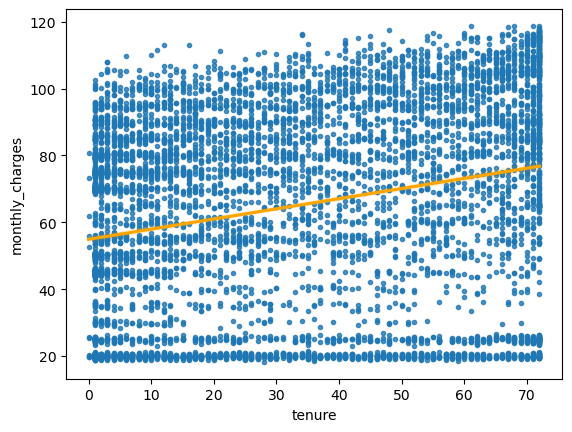

In [90]:
#tenure vs monthly charges
sns.regplot(x='tenure', y='monthly_charges', data = ten_cust, marker='.', line_kws={'color' : 'orange'})

In [91]:
def eval_dist(r,p,alpha=0.05):
    if p>alpha:
        return print(f'''The data is normally distributed''')
    else:
        return print(f'''The data is NOT normally distributed''')

In [92]:
from scipy.stats import shapiro

In [93]:
r, p = stats.shapiro(tco_df.monthly_charges)
r, p

/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9208889007568359, 0.0)

In [94]:
eval_dist(r,p)

The data is NOT normally distributed


In [95]:
r,p = stats.shapiro(tco_df.tenure)
r, p

(0.9037512540817261, 0.0)

In [96]:
eval_dist(r,p)

The data is NOT normally distributed


In [97]:
sr,sp = stats.spearmanr(ten_cust.tenure, ten_cust.monthly_charges)
sr,sp

(0.27641678933130215, 1.0271266876409408e-123)

In [98]:
def eval_Sresult(r, p, α=0.05):
    if p < α:
        return print(f"""Reject the null hypothesis. There is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject the null hypothesis that there is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")

In [99]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.276417
P-value: 1.0271266876409408e-123


In [100]:
ttl_charges_df = tco_df[['tenure', 'total_charges']]


In [101]:
ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

/var/folders/jd/t05l8rl14_l105k8kn2tdng40000gn/T/ipykernel_49630/309502529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


In [102]:
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


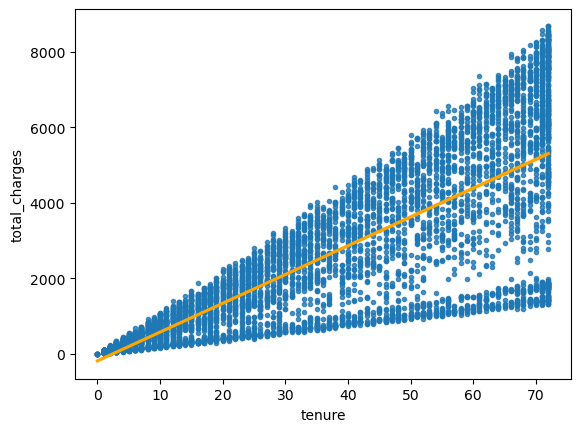

In [103]:
sns.regplot(x='tenure', y = 'total_charges', data=ttl_charges_df, marker='.', line_kws={'color': 'orange'})
plt.show()

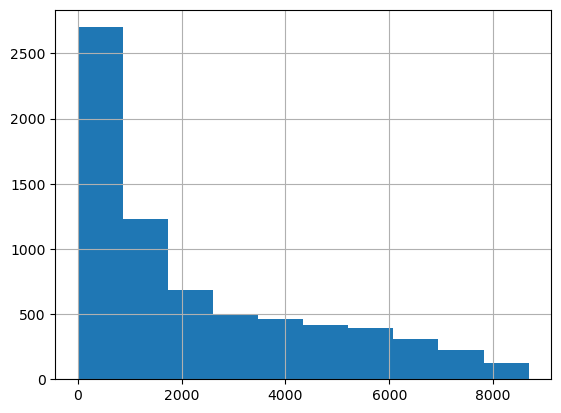

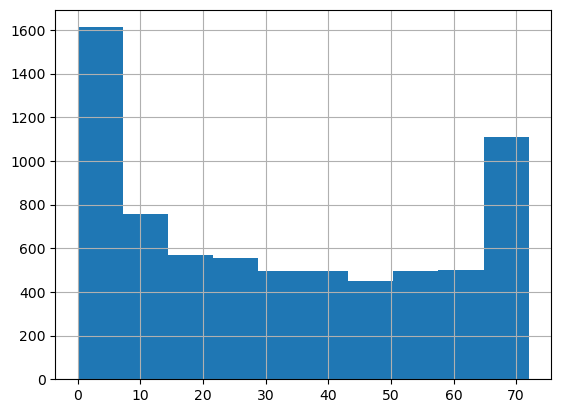

In [104]:
#visual check for distribution of total charges
ttl_charges_df.total_charges.hist()
plt.show()

#visual check for distribution of tenure
ttl_charges_df.tenure.hist()
plt.show()

In [105]:
#get r and p values using stats library
r,p = stats.shapiro(ttl_charges_df.total_charges)

#see those values
r,p

/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8601521253585815, 0.0)

In [106]:
eval_dist(r,p)

The data is NOT normally distributed


In [107]:
sr,sp = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)
sr,sp

(0.8896957900597577, 0.0)

In [108]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.889696
P-value: 0.0


$H_o$: There is no linear correlation between tenure and monthly charges of phone & internet customers


$H_a$: There is a linaer correlation between tenure and monthly charges of phone & internet customers

In [109]:
phone_df = tco_df[(tco_df.phone_service == "Yes") & (tco_df.internet_service_type_id == 1)][['monthly_charges', 'tenure']]


In [110]:
phone_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1739 non-null   float64
 1   tenure           1739 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


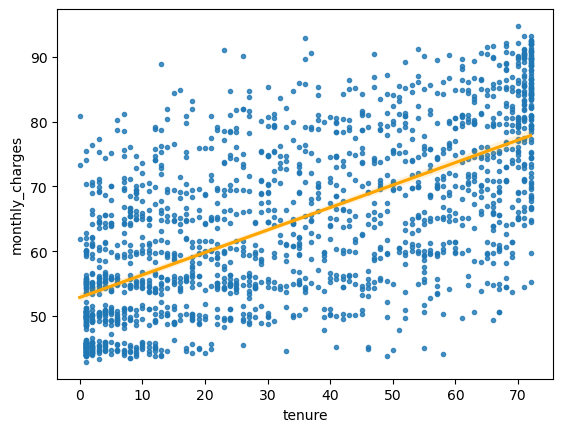

In [111]:
sns.regplot(x='tenure', y = 'monthly_charges', data=phone_df, marker='.', line_kws={'color': 'orange'})
plt.show()


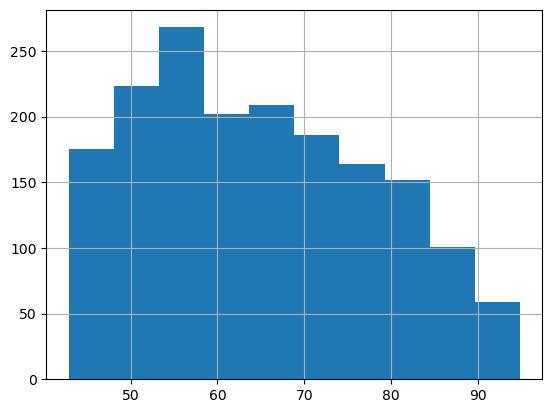

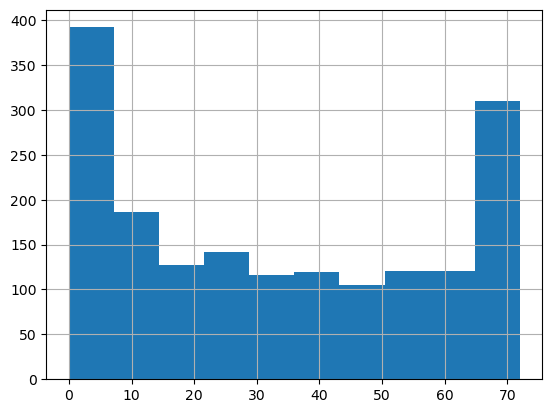

In [112]:
phone_df.monthly_charges.hist()
plt.show()
phone_df.tenure.hist()
plt.show()

In [113]:
#shapiro for monthly charges
r,p = stats.shapiro(phone_df.monthly_charges)

#see those values
r,p


(0.9584369659423828, 7.019588771857106e-22)

In [114]:
eval_dist(r,p)

The data is NOT normally distributed


In [115]:
#shapiro for tenure
r,p = stats.shapiro(phone_df.tenure)

#see those values
r,p

(0.8991788029670715, 2.3523856297437335e-32)

In [116]:
#using the function we created
eval_dist(r,p)

The data is NOT normally distributed


In [117]:
sr,sp = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
sr,sp

(0.6644708508462759, 5.423601644635052e-222)

In [118]:
eval_Sresult(r,p)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.899179
P-value: 2.3523856297437335e-32


# 3.) Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [119]:
query = """
select * 
from (
	select 
		e.emp_no
		,s.salary
		,e.hire_date
		,CASE WHEN s.to_date = '9999-01-01'
			THEN (select MAX(to_date) from salaries where to_date!='9999-01-01') -- this outputs the max to_date of 8-1-02
			ELSE s.to_date
			END AS to_date
		-- partition by columns that create unique observations
		,row_number() over(partition by e.emp_no, e.hire_date order by s.to_date DESC) as rn
	from employees e 
	join salaries s  on s.emp_no = e.emp_no) base
where base.rn = 1;
"""

In [120]:
some_db = 'employees'
engine = create_engine(env.get_db_url(some_db))
emp_df = pd.read_sql(query, engine.connect())
emp_df

,emp_no,salary,hire_date,to_date,rn
0,10001,88958,1986-06-26,2002-08-01,1
1,10002,72527,1985-11-21,2002-08-01,1
2,10003,43311,1986-08-28,2002-08-01,1
3,10004,74057,1986-12-01,2002-08-01,1
4,10005,94692,1989-09-12,2002-08-01,1
...,...,...,...,...,...
300019,499995,52868,1993-01-12,2002-08-01,1
300020,499996,69501,1990-09-27,2002-08-01,1
300021,499997,83441,1986-04-21,2002-08-01,1
300022,499998,55003,1993-10-13,2002-08-01,1


In [121]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300024 non-null  int64 
 1   salary     300024 non-null  int64 
 2   hire_date  300024 non-null  object
 3   to_date    300024 non-null  object
 4   rn         300024 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.4+ MB


In [122]:
# Needed to convert the datetime to float for amount of time employee was at company
# With new column
(emp_df.to_date - emp_df.hire_date).astype(str).str.split(" ", expand=True)

,0,1
0,5880,days
1,6097,days
2,5817,days
3,5722,days
4,4706,days
...,...,...
300019,3488,days
300020,4326,days
300021,5946,days
300022,3214,days


In [123]:
#reformatted tenure 
emp_df['tenure'] = (emp_df.to_date - emp_df.hire_date).astype(str).str.split(" ", expand=True)[0]


In [124]:
#convert to int!

emp_df.tenure = emp_df.tenure.astype(int)

In [125]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300024 non-null  int64 
 1   salary     300024 non-null  int64 
 2   hire_date  300024 non-null  object
 3   to_date    300024 non-null  object
 4   rn         300024 non-null  int64 
 5   tenure     300024 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.7+ MB


In [126]:
tenure_df = emp_df[['tenure', 'salary']]

In [127]:
tenure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   tenure  300024 non-null  int64
 1   salary  300024 non-null  int64
dtypes: int64(2)
memory usage: 4.6 MB


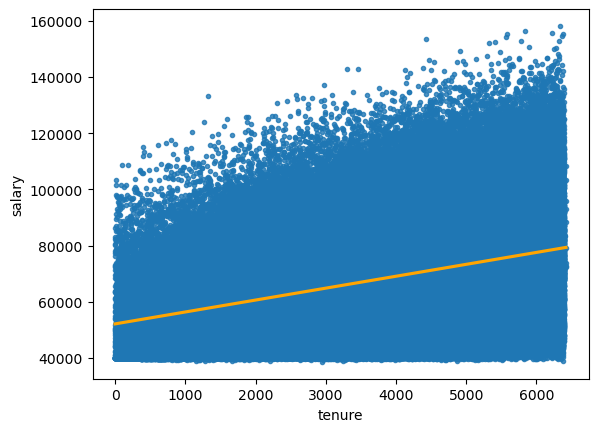

In [128]:
sns.regplot(x='tenure', y = 'salary', data=tenure_df, marker='.', line_kws=dict(color='orange'))
plt.show()

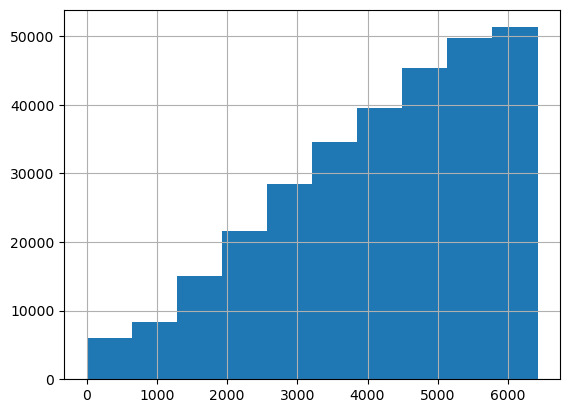

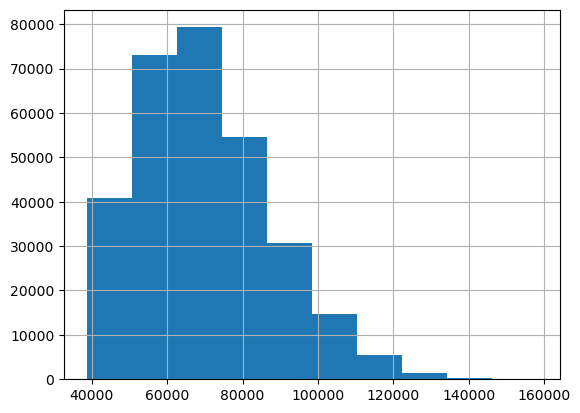

In [129]:
tenure_df.tenure.hist()
plt.show()

tenure_df.salary.hist()
plt.show()



In [131]:
r,p = stats.shapiro(tenure_df.tenure)
eval_dist(r,p)

The data is NOT normally distributed


In [132]:
r,p = stats.shapiro(tenure_df.salary)
eval_dist(r,p)

The data is NOT normally distributed


In [134]:
r,p = stats.spearmanr(emp_df.tenure, emp_df.salary)
r,p

(0.3752474702658628, 0.0)

In [136]:
eval_Sresult(r,p)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.375247
P-value: 0.0





4.) Use the sleepstudy data.
- Is there a relationship between days and reaction time?

<b>1: State Hypothesis & Set $\alpha$</b>
- $H_0$: There is no correlation between days and reaction time
- $H_a$: There is a correlation between days and reaction time

2: Select data and run .info

In [138]:
from pydataset import data

In [139]:
df = data('sleepstudy')

In [140]:
react_df = df[['Reaction', 'Days']]

In [141]:
react_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [142]:
react_df.head()

,Reaction,Days
1,249.5600,0
2,258.7047,1
3,250.8006,2
4,321.4398,3
5,356.8519,4


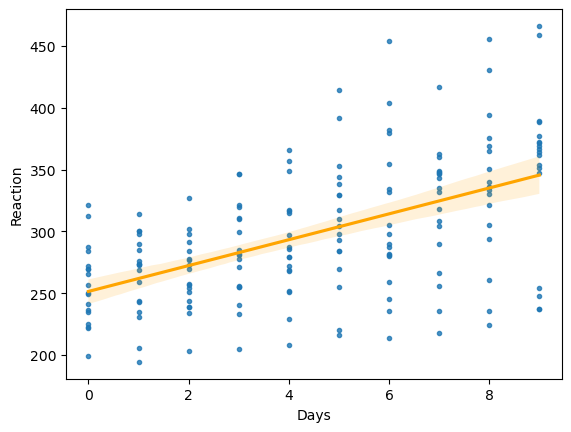

In [143]:
sns.regplot(x='Days', y='Reaction', data=react_df, marker='.', line_kws=dict(color='orange'))
plt.show()

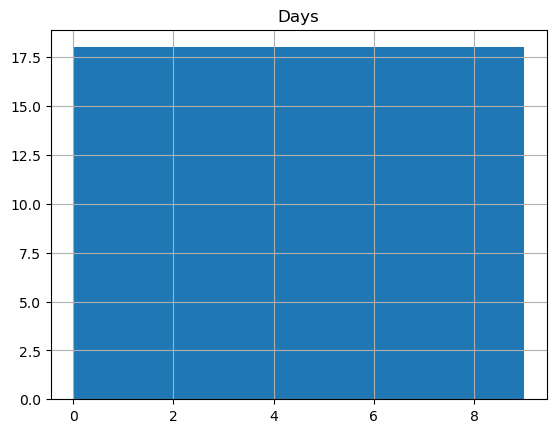

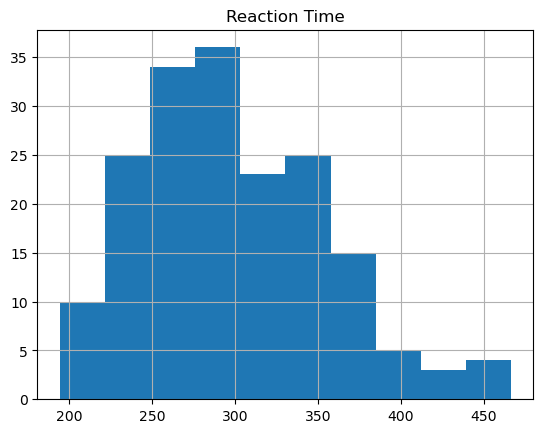

In [144]:
react_df.Days.hist()
plt.title('Days')
plt.show()

react_df.Reaction.hist()
plt.title('Reaction Time')
plt.show()

In [145]:
r,p = stats.shapiro(react_df.Days)
eval_dist(r,p)

The data is NOT normally distributed


In [146]:
r,p = stats.shapiro(react_df.Reaction)
eval_dist(r,p)

The data is NOT normally distributed


- Days is uniformly distributed 
- Reaction time is NOT normally distributed

<b>5: Run `stats` Tests</b>

In [148]:
r,p = stats.spearmanr(react_df.Days, react_df.Reaction)
r,p

(0.5228138502259547, 5.132878057706873e-14)

In [150]:
eval_Sresult(r,p)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.522814
P-value: 5.132878057706873e-14


# Comparison of Means Exercises

1.) Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
- Are adults who drink milk taller than adults who don't drink milk?
- Is the price of gas higher in Texas or in New Mexico?
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?


2.) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

3.) Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?